# Report Outlab02: Lagrange Interpolation
- Author: Kirill Shumilov
- Data: 01/23/2025

## Code

This is the code that is used to analyze and generate the plots

### Imports

In [2]:
import math
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Functions

In [3]:
def f(x):
    '''Function of interest'''
    return np.exp(x)


def f_n_plus_1(x):
    '''(n + 1)th derivative of f(x)'''
    return np.exp(x)


def M_n_plus_1(x):
    '''Absolute value of f^(n+1)'th largest value over the interval'''
    return np.max(np.abs(f_n_plus_1(x)))

def pi_n_plus_1(x, xi: np.array):
    return np.prod(x[:, np.newaxis] - xi, axis=1)


def B(x, xi):
    '''Error bound'''
    n = len(xi)
    return M_n_plus_1(x) * np.abs(pi_n_plus_1(x, xi)) / math.factorial(n)

### Helper Functions

In [4]:
DATADIR = pathlib.Path(f'./data/')

def get_data(n: int) -> tuple[pd.DataFrame, pd.DataFrame]:
    datadir = DATADIR / f'n{n}'
    dfi = pd.read_csv(datadir / 'input.csv')
    dfo = pd.read_csv(datadir / 'output.csv')

    # Get absolute error
    dfo['|E(x)|'] = np.abs(dfo['E(x)'])

    # Get error bound
    dfo['B(x)'] = B(dfo.x.values, dfi.x.values)

    return dfi, dfo

In [7]:
def plot_lagrange(dfi: pd.DataFrame, dfo: pd.DataFrame, n: int) -> None:
    fig = plt.figure(tight_layout=True)
    
    gs = gridspec.GridSpec(4, 1)

    # Plot the function and the Lagrange Interpolation Polynomial
    ax1 = fig.add_subplot(gs[:3, 0])
    ax1.set_title(fr'$f(x)=\exp(x), n={n}, m=100$')
    
    ax1.scatter('x', 'y', data=dfi, label='$y_i = f(x_i)$', c='red', marker='s')
    ax1.plot('x', 'f(x)', data=dfo, label='$f(x)$')
    ax1.plot('x', 'L(x)', data=dfo, label=f'$p_{n - 1}(x)$')
    ax1.legend()
    ax1.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelbottom=False
    )
    
    
    # Plot Absolute Error and Error Bound
    ax2 = fig.add_subplot(gs[3, 0], sharex=ax1)
    ax2.plot('x', '|E(x)|', data=dfo, label=r'$\text{Err}(x)=|p_{%d} - f(x)|$' % (n - 1), c='C2')
    ax2.legend()
    ax2.set_xlabel('$x$')

    ax2.plot('x', 'B(x)', data=dfo, c='C3', label=r'$\frac{|M_{%d}|}{%d!}\pi_{%d}(x)$' % (n, n, n))
    ax2.legend()
    ax2.set_xlabel('$x$')
    
    plt.savefig(DATADIR / f'n{n}' / 'plot.png')
    plt.show()

## Plots

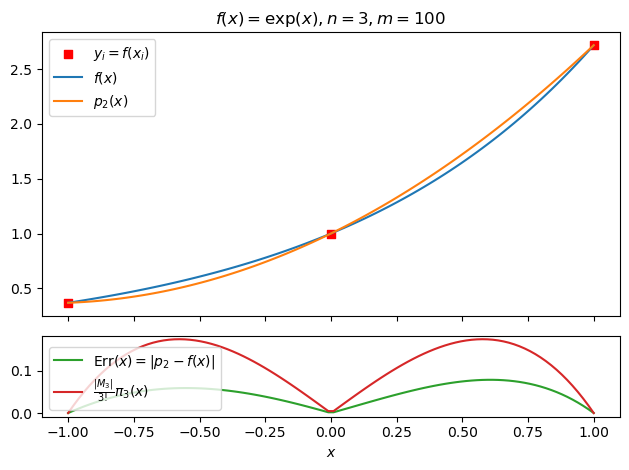

In [8]:
n = 3
dfi, dfo = get_data(n)
plot_lagrange(dfi, dfo, n)

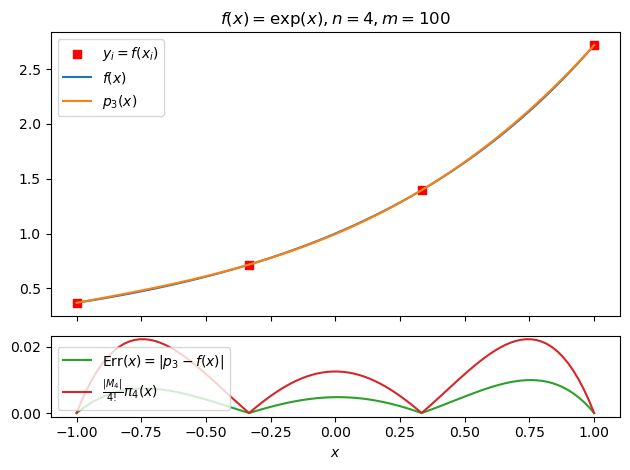

In [9]:
n = 4
dfi, dfo = get_data(n)
plot_lagrange(dfi, dfo, n)

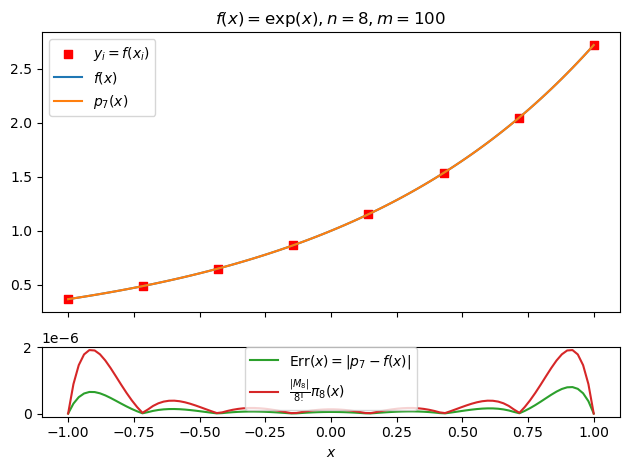

In [10]:
n = 8
dfi, dfo = get_data(n)
plot_lagrange(dfi, dfo, n)

## Notes and Remarks

As we can see from the graphs above as $n$ increases the interpolation error decreases. This can be observed by looking at the lower part of each plot, where the maximum value on he $y$ axis is $\approx1.5$ for $n=3$, $\approx0.02$ for $n=4$, and $2\times10^{-6}$ for $n=8$. The $n=3$ case is not enough to provide a good approximation for the function. However, just increaesing the number of interpolated points to $n=4$ already gives a workable approximation.